# Komponen Supervised case Logistic Regression:

1. input --> x 
2. output --> y

x dan y harus pair

3. True function
  - given x, nanti akan menghasilkan output y yang ada probabilistic dari masing - masing class nya. ex: class 1 proba 0.8, class 0 proba nya 1-0.8 = 0.2
  - output nya y element {0, 1}
4. Hypothesis Function
  - linear regression yang dikasih sigmoid function (predict function)
  
  `y_pred = sigmoid(theta, X)`
  $$
  \text{y_pred} = \sigma(\theta.X)
  $$
5. Optimization Algorithm
  - cost function --> log likelihood
  - stopping criterion 
      - ketika loss nya udah mendekati 0, converge
      - iteration
  - algorithm optimization --> gradient descent (cari best params for theta)
  - max or min (objective nya)

  gradient descent, kalo mau pake loglikelihood. di log kan karena sum lebih mudah di treat daripada product. 
  kalo negative loglikelihood berarti minimizing value nya? 
  
  argmin cari theta dari log loss
    
  
6. g element dari H

objective --> memaksimalkan likelihood

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
data_dict = {
    "x1": [0, 0, 1, 1],
    "x2": [0, 1, 0, 1],
    "y": [0, 1, 1, 1]
}

In [3]:
data = pd.DataFrame(data = data_dict)

In [4]:
data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [7]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

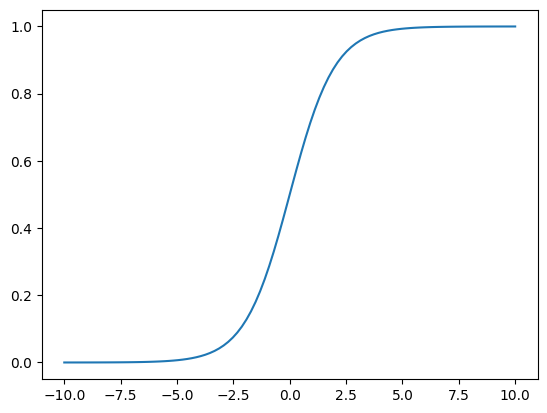

In [8]:
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)

### Negative Log Likelihood 

In [9]:
def neg_log_likelihood(data, theta):
    
    N = len(data)
    x_1 = data["x1"]
    x_2 = data["x2"]
    y = data["y"]
    
    z = theta[0] + (theta[1] * x_1) + (theta[2] * x_2)
    
    proba = sigmoid(z)
    
    log_loss = 0
    
    for i in range(N):
        log_loss += y[i]*np.log(proba[i]) + (1-y[i])*np.log(1-proba[i])
        
    return -log_loss, (np.array(proba) > 0.5).astype("int")

In [10]:
theta = np.random.rand(3)

In [11]:
neg_log_likelihood(data = data,
                   theta = theta)

(2.106851408909501, array([1, 1, 1, 1]))

### Gradient Descent 

In [12]:
def neg_log_likelihood_grad(data, theta):
    
    N = len(data)
    x_1 = data["x1"]
    x_2 = data["x2"]
    y = data["y"]
    
    z = theta[0] + (theta[1] * x_1) + (theta[2] * x_2)
    
    proba = sigmoid(z)
    
    grad_c = -np.sum(y - proba)
    grad_w1 = -np.dot(y - proba, x_1)
    grad_w2 = -np.dot(y - proba, x_2)
    
    return np.array([grad_c, grad_w1, grad_w2])

In [13]:
neg_log_likelihood_grad(data = data,
                        theta = theta)

array([-0.48722081, -0.61262482, -0.73122349])

In [14]:
def gradient_descent(data, theta,
                     learning_rate, n_iter,
                     epsilon = 1e-6):
    
    x_1 = data["x1"]
    x_2 = data["x2"]
    
    l_history = []
    theta_update = theta.copy()
    
    for i in tqdm(range(n_iter)):
        l_i = neg_log_likelihood(data, theta_update) # calculate log loss
        grad_i = neg_log_likelihood_grad(data, theta_update) # calculate log loss grad
        
        l_history.append(l_i) # likelihood yang dihitung dan masukkan history nya
        
        # karena kita ingin mencari nilai paling kecil, maka dikurangi
        theta_update -= learning_rate * grad_i 
        
        # jika nilai grad lebih kecil dari epsilon atau nilai yg berkurang tidak signifikan maka akan stop
        if np.abs(grad_i).all() < epsilon:
            break
        
    z = theta_update[0] + (theta_update[1] * x_1) + (theta_update[2] * x_2)
    
    proba = sigmoid(z)
        
    return theta_update, l_history, (np.array(proba) > 0.5).astype("int")

In [15]:
theta = np.random.rand(3)

theta, history, proba_result = gradient_descent(data, theta,
                                                learning_rate = 1e-3,
                                                n_iter=50_000)

100%|████████████████████████████████████| 50000/50000 [01:27<00:00, 569.42it/s]


In [16]:
proba_result

array([0, 1, 1, 1])

In [17]:
history[-10:]

[(0.18600033398523091, array([0, 1, 1, 1])),
 (0.1859967562542944, array([0, 1, 1, 1])),
 (0.1859931786563576, array([0, 1, 1, 1])),
 (0.1859896011914138, array([0, 1, 1, 1])),
 (0.18598602385945495, array([0, 1, 1, 1])),
 (0.1859824466604742, array([0, 1, 1, 1])),
 (0.18597886959446394, array([0, 1, 1, 1])),
 (0.18597529266141774, array([0, 1, 1, 1])),
 (0.18597171586132774, array([0, 1, 1, 1])),
 (0.1859681391941865, array([0, 1, 1, 1]))]

In [18]:
theta

array([-2.19907479,  5.38762145,  5.39287227])

In [19]:
b = theta[0]
w_1 = theta[1]
w_2 = theta[2]

In [20]:
m = -w_1/w_2
c = -b/w_2

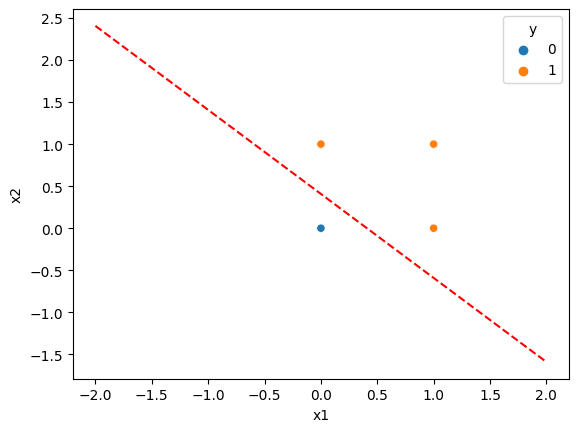

In [24]:
sns.scatterplot(data=data,
                x="x1",
                y="x2",
                hue="y")


x_support = np.linspace(-2, 2)
y_support = m*x_support + c

plt.plot(x_support, y_support, "--r")

plt.show()